In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',181)

In [2]:
df=pd.read_excel('World military power.xlsx',header=[0,1])

In [3]:
df

2020 ranking                               Airforce Strength  \
    Military Strength Military Strength Power Index Aircraft Strength   
0         Afghanistan                        1.3444       Afghanistan   
1             Albania                        2.3137           Albania   
2             Algeria                        0.4659           Algeria   
3              Angola                        0.8379            Angola   
4           Argentina                        0.6521         Argentina   
..                ...                           ...               ...   
133         Venezuela                        0.6449         Venezuela   
134           Vietnam                        0.3559           Vietnam   
135             Yemen                        1.2412             Yemen   
136            Zambia                        1.6464            Zambia   
137          Zimbabwe                        1.7577          Zimbabwe   

                                                          \
    Aircraft Strength value Fighter/Interceptor Strength   
0                       260                  Afghanistan   
1                        19                      Albania   
2                       551                      Algeria   
3                       295                       Angola   
4                       227                    Argentina   
..                      ...                          ...   
133                     260                    Venezuela   
134                     293                      Vietnam   
135                     169                        Yemen   
136                     108                       Zambia   
137                      90                     Zimbabwe   

                                                                 \
    Fighter/Interceptor Strength value Attack Aircraft Strength   
0                                    0              Afghanistan   
1                                    0                  Albania   
2                                  103                  Algeria   
3                                   72                   Angola   
4                                   24                Argentina   
..                                 ...                      ...   
133                                 38                Venezuela   
134                                 77                  Vietnam   
135                                 77                    Yemen   
136                                 18                   Zambia   
137                                 10                 Zimbabwe   

                                                                      \
    Attack Aircraft Strength value Transport Aircraft Fleet Strength   
0                               25                       Afghanistan   
1                                0                           Albania   
2                               22                           Algeria   
3                               18                            Angola   
4                                7                         Argentina   
..                             ...                               ...   
133                              0                         Venezuela   
134                              0                           Vietnam   
135                              0                             Yemen   
136                              0                            Zambia   
137                              0                          Zimbabwe   

                                                                    \
    Transport Aircraft Fleet Strength value Trainer Aircraft Fleet   
0                                        30            Afghanistan   
1                                         0                Albania   
2                                        59                Algeria   
3                                        30                 Angola   
4                                         9      

In [4]:
df.columns = ['_'.join(tuple(map(str, t))) for t in df.columns.values]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   2020 ranking_Military Strength                             138 non-null    object 
 1   2020 ranking_Military Strength Power Index                 138 non-null    float64
 2   Airforce Strength_Aircraft Strength                        138 non-null    object 
 3   Airforce Strength_Aircraft Strength value                  138 non-null    int64  
 4   Airforce Strength_Fighter/Interceptor Strength             138 non-null    object 
 5   Airforce Strength_Fighter/Interceptor Strength value       138 non-null    int64  
 6   Airforce Strength_Attack Aircraft Strength                 138 non-null    object 
 7   Airforce Strength_Attack Aircraft Strength value           138 non-null    int64  
 8   Airforce S

In [6]:
df.isnull().sum().sort_values(ascending=False)

Geography_Total Coastline Coverage value                     29
Geography_Total Coastline Coverage                           29
Navy Strength_Submarine Fleet Strength                       23
Navy Strength_Frigate Fleet Strength value                   23
Navy Strength_Frigate Fleet Strength                         23
Navy Strength_Destroyer Fleet Strength value                 23
Navy Strength_Destroyer Fleet Strength                       23
Navy Strength_Submarine Fleet Strength value                 23
Navy Strength_Aircraft Carrier Fleet Strength value          23
Navy Strength_Aircraft Carrier Fleet Strength                23
Navy Strength_Navy Fleet Strengths                           14
Navy Strength_Navy Fleet Strengths value                     14
Geography_Total Border Coverage                               9
Geography_Total Border Coverage value                         9
Airforce Strength_Attack Helicopter Fleet Strength            0
Manpower_Available Manpower             

In [7]:
df['Geography_Total Coastline Coverage'].nunique()

109

In [8]:
df['Geography_Total Coastline Coverage value'].fillna('0',inplace=True)
df['Geography_Total Coastline Coverage'].fillna('None',inplace=True)
df['Navy Strength_Submarine Fleet Strength'].fillna('None',inplace=True)
df['Navy Strength_Frigate Fleet Strength value'].fillna('0',inplace=True)
df['Navy Strength_Frigate Fleet Strength'].fillna('None',inplace=True)
df['Navy Strength_Destroyer Fleet Strength value'].fillna('0',inplace=True)
df['Navy Strength_Destroyer Fleet Strength'].fillna('None',inplace=True)
df['Navy Strength_Submarine Fleet Strength value'].fillna('0',inplace=True)
df['Navy Strength_Aircraft Carrier Fleet Strength value'].fillna('0',inplace=True)
df['Navy Strength_Aircraft Carrier Fleet Strength'].fillna('None',inplace=True)
df['Navy Strength_Navy Fleet Strengths'].fillna('None',inplace=True)
df['Navy Strength_Navy Fleet Strengths value'].fillna('0',inplace=True)
df['Geography_Total Border Coverage'].fillna('None',inplace=True)
df['Geography_Total Border Coverage value'].fillna('0',inplace=True)


In [9]:
df

,2020 ranking_Military Strength,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget,Finances_defense spending budget value,Finances_External Debt,Finances_External Debt value,Logistics_Airport Totals,Logistics_Airport Totals value,Natural resources_Oil Production,Natural resources_Oil Production value,Natural resources_Oil Consumption,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower,Manpower_Available Manpower value,Manpower_Total Population,Manpower_Total Population value,Geography_Total Square Land Area,Geography_Total Square Land Area value,Geography_Total Coastline Coverage,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage,Geography_Total Waterway Coverage value,Geography_Total Border Coverage,Geography_Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,0.0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.0
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,0.0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.0
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201.0,Algeria,0.0,Algeria,6.0,Algeria,0.0,Algeria,5.0,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.0
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,0.0,Angola,"7,00,00,00,000",Angola,"42,08

In [10]:
df['2020 ranking_Military Strength Power Index']

0      1.3444
1      2.3137
2      0.4659
3      0.8379
4      0.6521
        ...  
133    0.6449
134    0.3559
135    1.2412
136    1.6464
137    1.7577
Name: 2020 ranking_Military Strength Power Index, Length: 138, dtype: float64

In [11]:
df.isnull().sum()

2020 ranking_Military Strength                               0
2020 ranking_Military Strength Power Index                   0
Airforce Strength_Aircraft Strength                          0
Airforce Strength_Aircraft Strength value                    0
Airforce Strength_Fighter/Interceptor Strength               0
Airforce Strength_Fighter/Interceptor Strength value         0
Airforce Strength_Attack Aircraft Strength                   0
Airforce Strength_Attack Aircraft Strength value             0
Airforce Strength_Transport Aircraft Fleet Strength          0
Airforce Strength_Transport Aircraft Fleet Strength value    0
Airforce Strength_Trainer Aircraft Fleet                     0
Airforce Strength_Trainer Aircraft Fleet value               0
Airforce Strength_Helicopter Fleet Strength                  0
Airforce Strength_Helicopter Fleet Strength value            0
Airforce Strength_Attack Helicopter Fleet Strength           0
Airforce Strength_Attack Helicopter Fleet Strength valu

In [12]:
df=pd.get_dummies(df)

In [13]:
x=df

In [14]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust(clusters):
     for no_of_cluster in np.arange(1,clusters):
        no_of_cluster +=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(x)
        pred=model.predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(x,pred)
        print('Number of cluster{},silhouette{}'.format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)

Number of cluster2,silhouette0.9022029958095321
Number of cluster3,silhouette0.7815532545770416
Number of cluster4,silhouette0.7800776787676357
Number of cluster5,silhouette0.6945333914472228
Number of cluster6,silhouette0.6444802894568614
Number of cluster7,silhouette0.5342524234662963
Number of cluster8,silhouette0.5168330133002873
Number of cluster9,silhouette0.5103846506901891
Number of cluster10,silhouette0.5032799047531756


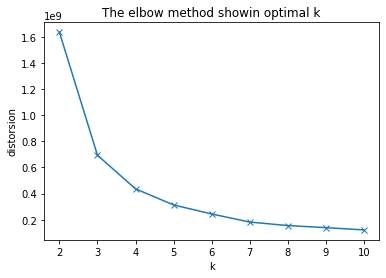

In [15]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('distorsion')
plt.title('The elbow method showin optimal k')
plt.show()

In [16]:
model=KMeans(n_clusters=7)

In [17]:
eğit=model.fit(x)

In [18]:
sınıflandır=eğit.predict(x)

In [19]:
sınıflandır

array([0, 0, 4, 0, 0, 0, 5, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0,
       5, 0, 0, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 5, 4, 0, 0, 4,
       0, 5, 0, 0, 0, 2, 0, 4, 4, 0, 2, 4, 0, 5, 5, 0, 0, 0, 0, 0, 0, 5,
       0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 5, 0, 0, 5, 0, 0, 0, 5, 2,
       0, 0, 0, 4, 0, 0, 0, 0, 5, 0, 0, 0, 5, 1, 2, 0, 0, 5, 0, 0, 0, 5,
       2, 0, 5, 0, 0, 0, 0, 0, 4, 5, 0, 0, 5, 0, 2, 5, 0, 2, 4, 4, 3, 0,
       0, 0, 5, 0, 0, 0])

In [20]:
(silhouette_score(x,sınıflandır))

0.5342524234662963

In [21]:
x['sınıf']=sınıflandır

In [22]:
x['sınıf'].value_counts()

0    91
5    26
4    10
2     8
6     1
1     1
3     1
Name: sınıf, dtype: int64

In [23]:
x

,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Logistics_Airport Totals value,2020 ranking_Military Strength_Afghanistan,2020 ranking_Military Strength_Albania,2020 ranking_Military Strength_Algeria,2020 ranking_Military Strength_Angola,2020 ranking_Military Strength_Argentina,2020 ranking_Military Strength_Armenia,2020 ranking_Military Strength_Australia,2020 ranking_Military Strength_Austria,2020 ranking_Military Strength_Azerbaijan,2020 ranking_Military Strength_Bahrain,2020 ranking_Military Strength_Bangladesh,2020 ranking_Military Strength_Belarus,2020 ranking_Military Strength_Belgium,2020 ranking_Military Strength_Bhutan,2020 ranking_Military Strength_Bolivia,2020 ranking_Military Strength_Bosnia and Herzegovina,2020 ranking_Military Strength_Botswana,2020 ranking_Military Strength_Brazil,2020 ranking_Military Strength_Bulgaria,2020 ranking_Military Strength_Burkina Faso,2020 ranking_Military Strength_Cambodia,2020 ranking_Military Strength_Cameroon,2020 ranking_Military Strength_Canada,2020 ranking_Military Strength_Central African Republic,2020 ranking_Military Strength_Chad,2020 ranking_Military Strength_Chile,2020 ranking_Military Strength_China,2020 ranking_Military Strength_Colombia,2020 ranking_Military Strength_Croatia,2020 ranking_Military Strength_Cuba,2020 ranking_Military Strength_Czechia,2020 ranking_Military Strength_Democratic Republic of the Congo,2020 ranking_Military Strength_Denmark,2020 ranking_Military Strength_Dominican Republic,2020 ranking_Military Strength_Ecuador,2020 ranking_Military Strength_Egypt,2020 ranking_Military Strength_El Salvador,2020 ranking_Military Strength_Estonia,2020 ranking_Military Strength_Ethiopia,2020 ranking_Military Strength_Finland,2020 ranking_Military Strength_France,2020 ranking_Military Strength_Gabon,2020 ranking_Military Strength_Georgia,2020 ranking_Military Strength_Germany,2020 ranking_Military Strength_Ghana,2020 ranking_Military Strength_Greece,2020 ranking_Military Strength_Guatemala,2020 ranking_Military Strength_Honduras,2020 ranking_Military Strength_Hungary,2020 ranking_Military Strength_India,2020 ranking_Military Strength_Indonesia,2020 ranking_Military Strength_Iran,2020 ranking_Military Strength_Iraq,2020 ranking_Military Strength_Ireland,2020 ranking_Military Strength_Israel,2020 ranking_Military Strength_Italy,2020 ranking_Military Strength_Ivory Coast,2020 ranking_Military Strength_Japan,2020 ranking_Military Strength_Jordan,2020 ranking_Military Strength_Kazakhstan,2020 ranking_Military Strength_Kenya,2020 ranking_Military Strength_Kuwait,2020 ranking_Military Strength_Kyrgyzstan,2020 ranking_Military Strength_Laos,2020 ranking_Military Strength_Latvia,2020 ranking_Military Strength_Lebanon,2020 ranking_Military Strength_Liberia,2020 ranking_Military Strength_Libya,2020 ranking_Military Strength_Lithuania,2020 ranking_Military Strength_Madagascar,2020 ranking_Military Strength_Malaysia,2020 ranking_Military Strength_Mali,2020 ranking_Military Strength_Mauritania,2020 ranking_Military Strength_Mexico,2020 ranking_Military Strength_Moldova,2020 ranking_Military Strength_Mongolia,...,Geography_Total Border Coverage value_1770.0,Geography_Total Border Coverage value_1806.0,Geography_Total Border Coverage value_1814.0,Geography_Total Border Coverage value_1836.0,Geography_Total Border Coverage value_1885.0,Geography_Total Border Coverage value_1907.0,Geography_Total Border Coverage value_1953